Noisy Simulations and Benchmarking - Swap Test

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

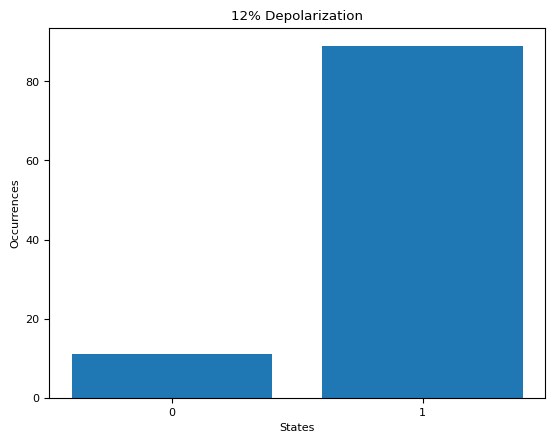

In [2]:
# Create the circuit that prepares a single qubit in the |1⟩  state with a 12% chance of depolarization throughout the whole circuit
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()

circuit.append(cirq.X(qubit))
circuit.append(cirq.measure(qubit))

# Simulate the circuit with noise
noise = cirq.depolarize(0.12)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '12% Depolarization', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))
plt.show()

A circuit that 100 times prepares three qubits in the  1/sqrt(2)(|000⟩+|111⟩) (GHZ) state with no noise

This is exactly the same as preparing the Bell state 1/sqrt(2)(|00⟩+|11⟩), except additionally applying a CNOT to entangle the 0th and 2nd qubit too

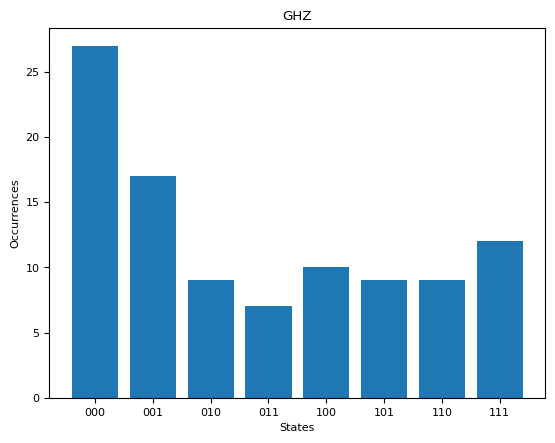

In [3]:
"""
# Simulate the circuit with noise
noise = cirq.depolarize(0.12)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)
"""

# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

noise = cirq.depolarize(0.25)

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))
circuit.append(cirq.measure(qubits))

circuit = circuit.with_noise(noise)

# Simulate the circuit

sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

In [ ]:
#circuit simulated 100 times that prepares three qubits in the  12√(|000⟩+|111⟩)  state with a 25% chance of depolarization throughout the whole circuit

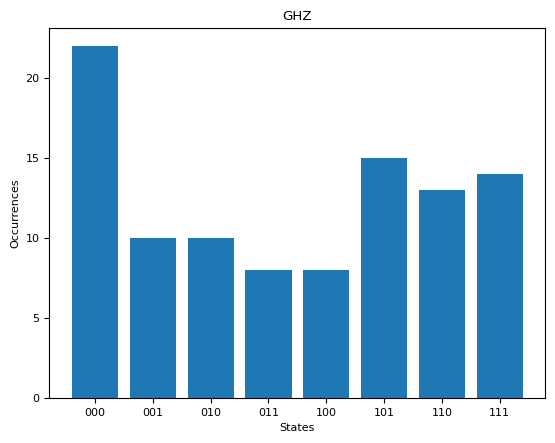

In [4]:
"""
# Simulate the circuit with noise
noise = cirq.depolarize(0.12)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)
"""

# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

noise = cirq.depolarize(0.25)

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))
circuit.append(cirq.measure(qubits))

circuit = circuit.with_noise(noise)

# Simulate the circuit

sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

This section studies the effect of amplitude damping on preparing the  |+⟩  state
1. Calculate the fidelity of preparing the  |+⟩  state without noise and with amplitude damping for a range of probabilities from 0 to 1. Then plot the results against the given theoretical values.

In [5]:
noise_probabilities = np.linspace(0, 1, 500)


fidelities = []
for prob in noise_probabilities:
# 1. PREPARE QUBITS
  #===================
  # Create qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  # Prepare the given states
  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.I(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.I(q1))


  noise = cirq.depolarize(prob)
  circuit = circuit_0 + circuit_1.with_noise(noise)

  # 2. SWAP TEST CIRCUIT
  #======================
  # Put ancilla in superposition
  circuit.append(cirq.H(ancilla))

  # Controlled-Swap controlled by ancilla and targeting q0 and q1
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  # Apply an H gate on the ancilla.
  circuit.append(cirq.H(ancilla))

  # Measure ancilla
  circuit.append(cirq.measure(ancilla))



  # 3. RUN CIRCUIT
  #================
  simulator = cirq.Simulator()
  result = simulator.run(circuit, repetitions=1000)



  # 4. CALCULATE FIDELITY
  #=======================
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  fidelities += [fidelity]

# PLOT THE RESULTS
#==================
plt.scatter(noise_probabilities, fidelities, label = 'Simulation')

# These theoretical values only apply to amplitude damping on a single qubit
theoretical_fidelities = [1/2*(1 + (1 - p)**(1/2)) for p in noise_probabilities]
plt.scatter(noise_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Amplitude Damping Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()

KeyboardInterrupt: 

Now assuming noise on the whole swap circuit

In [ ]:
noise_probabilities = np.linspace(0, 1, 500)


fidelities = []
for prob in noise_probabilities:
# 1. PREPARE QUBITS
  #===================
  # Create qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  # Prepare the given states
  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.I(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.I(q1))


  noise = cirq.depolarize(prob)
  circuit = circuit_0.with_noise(noise) + circuit_1.with_noise(noise)

  # 2. SWAP TEST CIRCUIT
  #======================
  # Put ancilla in superposition
  circuit.append(cirq.H(ancilla))

  # Controlled-Swap controlled by ancilla and targeting q0 and q1
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  # Apply an H gate on the ancilla.
  circuit.append(cirq.H(ancilla))

  # Measure ancilla
  circuit.append(cirq.measure(ancilla))



  # 3. RUN CIRCUIT
  #================
  simulator = cirq.Simulator()
  result = simulator.run(circuit, repetitions=1000)



  # 4. CALCULATE FIDELITY
  #=======================
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  fidelities += [fidelity]

# PLOT THE RESULTS
#==================
plt.scatter(noise_probabilities, fidelities, label = 'Simulation')

# These theoretical values only apply to amplitude damping on a single qubit
theoretical_fidelities = [1/2*(1 + (1 - p)**(1/2)) for p in noise_probabilities]
plt.scatter(noise_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Amplitude Damping Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()